**Titanic Survival Prediction**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
titanic_df = pd.read_csv('/content/sample_data/Titanic.csv')

In [27]:
print(titanic_df.head())  # Display the first few rows of the dataset
print(titanic_df.info())  # Get an overview of the dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [28]:
print(titanic_df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
# Handle missing values in 'Age' column
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Drop 'Cabin' column
# titanic_df.drop('Cabin', axis=1, inplace=True)
titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0], inplace=True)


# Handle missing values in 'Embarked' column
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [30]:
print(titanic_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


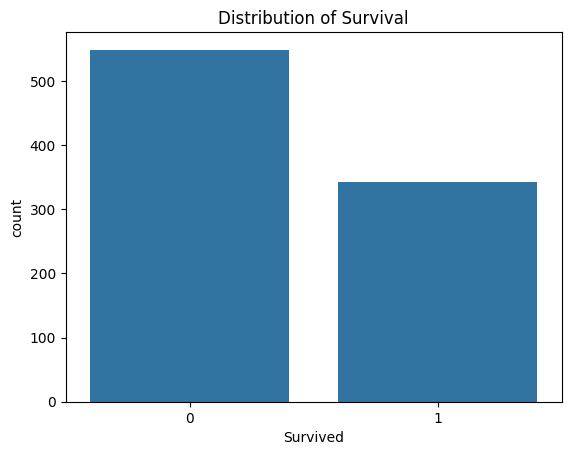

In [31]:
# Visualize the distribution of survival
sns.countplot(x='Survived', data=titanic_df)
plt.title('Distribution of Survival')
plt.show()

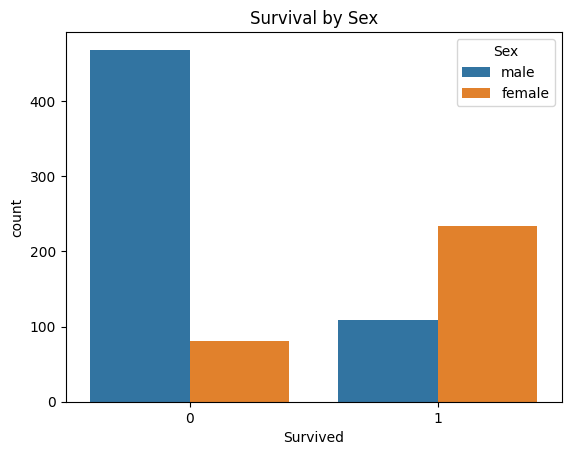

In [32]:
# Visualize survival by other variables
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival by Sex')
plt.show()

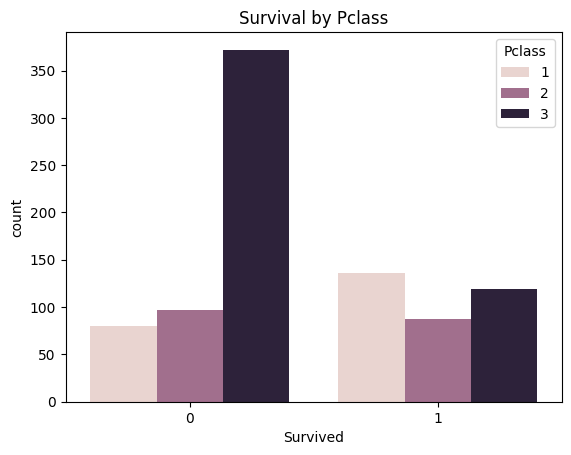

In [33]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival by Pclass')
plt.show()

In [34]:
# Preprocess the data
# Drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [35]:
# Fill missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [36]:
# Convert categorical variables into dummy/indicator variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

In [37]:
# Train-test split
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Predictions
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

In [40]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9789325842696629
Test Accuracy: 0.8212290502793296


In [41]:
# Classification report and confusion matrix
print('Classification Report (Test Data):\n', classification_report(y_test, y_pred_test))
print('Confusion Matrix (Test Data):\n', confusion_matrix(y_test, y_pred_test))

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix (Test Data):
 [[91 14]
 [18 56]]
